In [1]:
import pandas as pd


df = pd.read_csv(r"C:\Users\isaac\Documents\Pst&b\Bootcamp\S3\J4\Apple Stock Prices From 1981 to 2023\Apple Stock Prices (1981 to 2023).csv")


In [7]:
df.head()
df.info()
df.describe()
df.isnull().sum()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


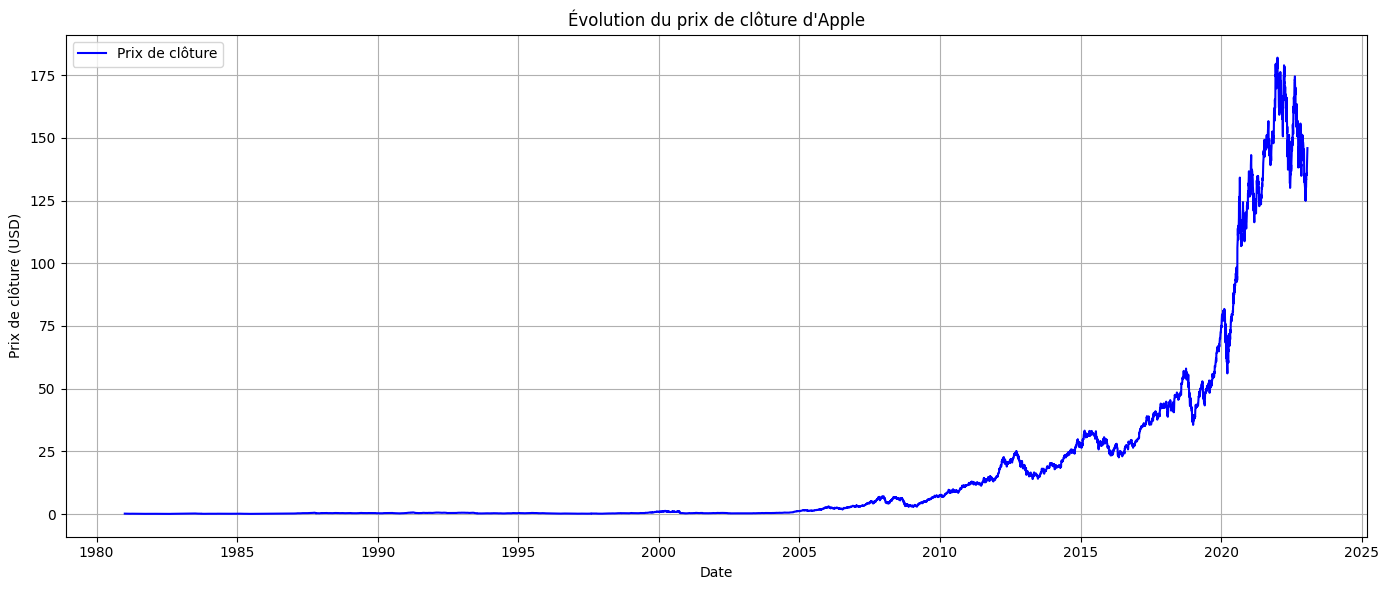

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], color='blue', label='Prix de clôture')
plt.title("Évolution du prix de clôture d'Apple")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


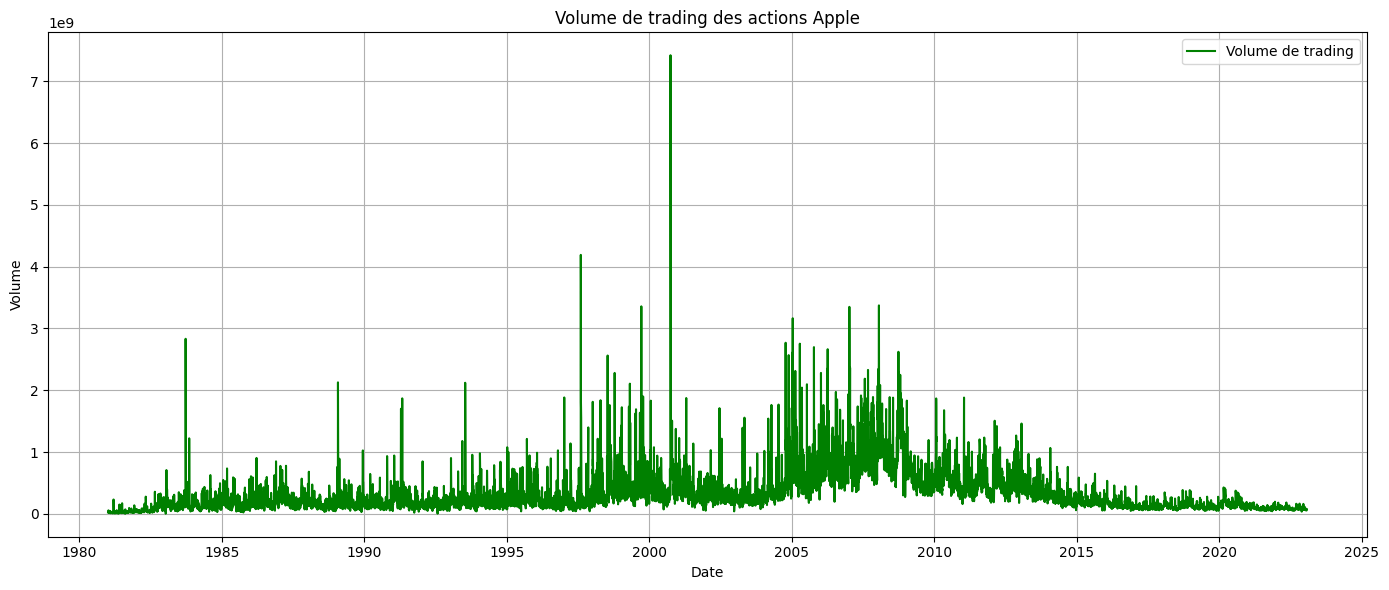

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volume'], color='green', label='Volume de trading')
plt.title("Volume de trading des actions Apple")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
!pip install mplfinance

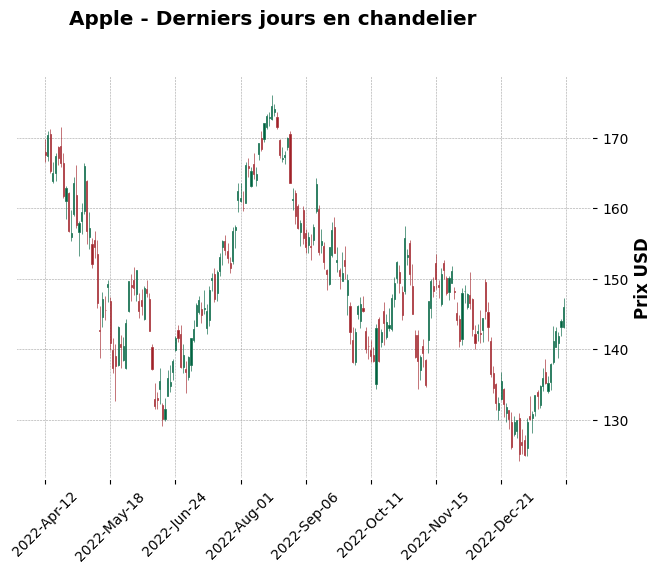

In [14]:
import mplfinance as mpf

df_candle = df.copy()
df_candle.set_index('Date', inplace=True)


df_candle = df_candle[['Open', 'High', 'Low', 'Close']]


mpf.plot(df_candle[-200:], type='candle', style='charles', title="Apple - Derniers jours en chandelier", ylabel='Prix USD', volume=False)


In [15]:

closing_prices = df['Close']

mean_price = closing_prices.mean()
median_price = closing_prices.median()
std_price = closing_prices.std()
var_price = closing_prices.var()
min_price = closing_prices.min()
max_price = closing_prices.max()

print(f"Moyenne : {mean_price:.2f} $")
print(f"Médiane : {median_price:.2f} $")
print(f"Écart-type : {std_price:.2f} $")
print(f"Variance : {var_price:.2f}")
print(f"Minimum : {min_price:.2f} $")
print(f"Maximum : {max_price:.2f} $")


Moyenne : 16.70 $
Médiane : 0.49 $
Écart-type : 35.47 $
Variance : 1258.40
Minimum : 0.05 $
Maximum : 182.01 $


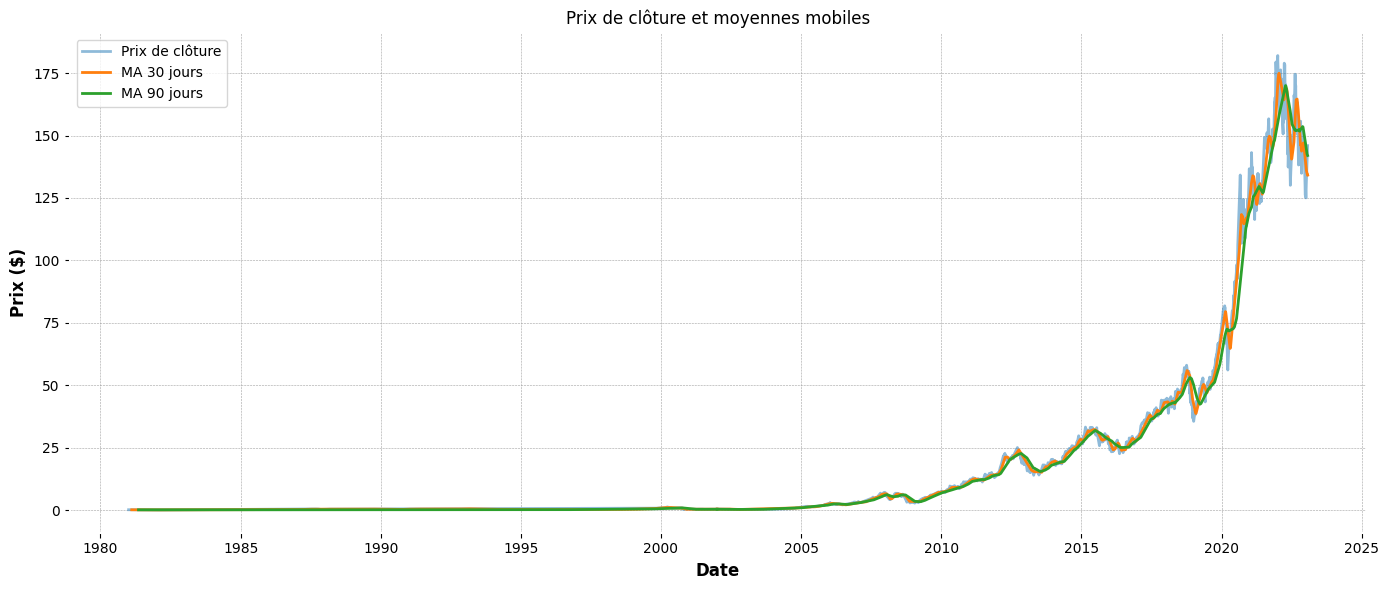

In [16]:
import matplotlib.pyplot as plt


df['MA_30'] = df['Close'].rolling(window=30).mean()


df['MA_90'] = df['Close'].rolling(window=90).mean()


plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Prix de clôture', alpha=0.5)
plt.plot(df['Date'], df['MA_30'], label='MA 30 jours', linewidth=2)
plt.plot(df['Date'], df['MA_90'], label='MA 90 jours', linewidth=2)
plt.title("Prix de clôture et moyennes mobiles")
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
!pip install nbformat


In [40]:
!pip install --upgrade nbformat ipython



In [1]:
!pip install plotly

In [4]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("C:/Users/isaac/Documents/Pst&b/Bootcamp/S3/J4/Apple Stock Prices From 1981 to 2023/Apple Stock Prices (1981 to 2023).csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)



In [6]:
fig = go.Figure(data=[
    go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='Prix'
    )
])

# Mise en page interactive avec boutons de zoom
fig.update_layout(
    title="Cours de l'action Apple (1981–2023) - Vue en chandeliers",
    xaxis_title="Date",
    yaxis_title="Prix de clôture (USD)",
    xaxis_rangeslider_visible=False,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(count=3, label="3M", step="month", stepmode="backward"),
                dict(count=6, label="6M", step="month", stepmode="backward"),
                dict(count=1, label="1Y", step="year", stepmode="backward"),
                dict(step="all", label="All")
            ])
        ),
        type="date"
    )
)

fig.show()

In [7]:
from scipy.stats import ttest_ind

df['Year'] = df['Date'].dt.year
close_2000 = df[df['Year'] == 2000]['Close']
close_2020 = df[df['Year'] == 2020]['Close']

t_stat, p_value = ttest_ind(close_2000, close_2020, equal_var=False)

print(f"T-statistic : {t_stat:.4f}")
print(f"P-value : {p_value:.4f}")
if p_value < 0.05:
    print("✅ Il y a une différence significative entre les deux années.")
else:
    print("❌ Aucune différence significative détectée entre les deux années.")


T-statistic : -68.9350
P-value : 0.0000
✅ Il y a une différence significative entre les deux années.


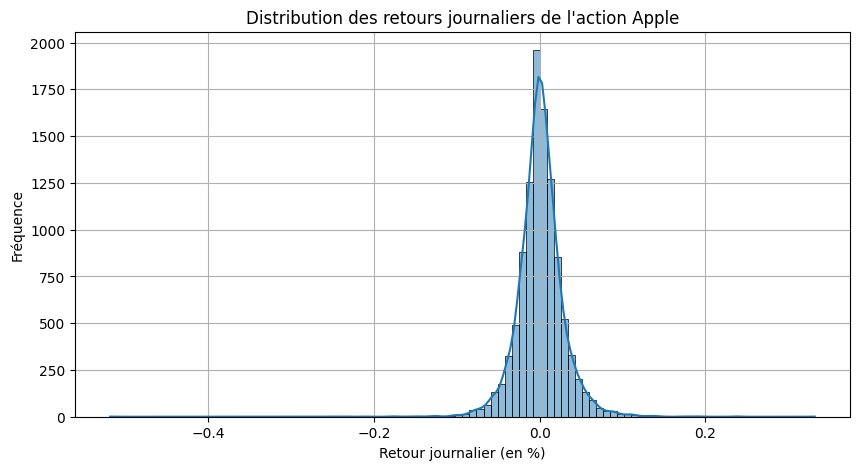

Shapiro-Wilk Test:
  - Statistique : 0.9191
  - p-value     : 0.0000

D’Agostino Test:
  - Statistique : 2719.2053
  - p-value     : 0.0000

❌ Les retours journaliers ne suivent pas une distribution normale.


C:\Users\isaac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10607.



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest


df['Daily_Return'] = df['Close'].pct_change()


plt.figure(figsize=(10, 5))
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True)
plt.title("Distribution des retours journaliers de l'action Apple")
plt.xlabel("Retour journalier (en %)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

shapiro_test = shapiro(df['Daily_Return'].dropna())
print(f"Shapiro-Wilk Test:")
print(f"  - Statistique : {shapiro_test.statistic:.4f}")
print(f"  - p-value     : {shapiro_test.pvalue:.4f}")


dagostino_test = normaltest(df['Daily_Return'].dropna())
print(f"\nD’Agostino Test:")
print(f"  - Statistique : {dagostino_test.statistic:.4f}")
print(f"  - p-value     : {dagostino_test.pvalue:.4f}")

# Interprétation
if shapiro_test.pvalue < 0.05 and dagostino_test.pvalue < 0.05:
    print("\n❌ Les retours journaliers ne suivent pas une distribution normale.")
else:
    print("\n✅ Les retours journaliers peuvent être considérés comme normaux.")


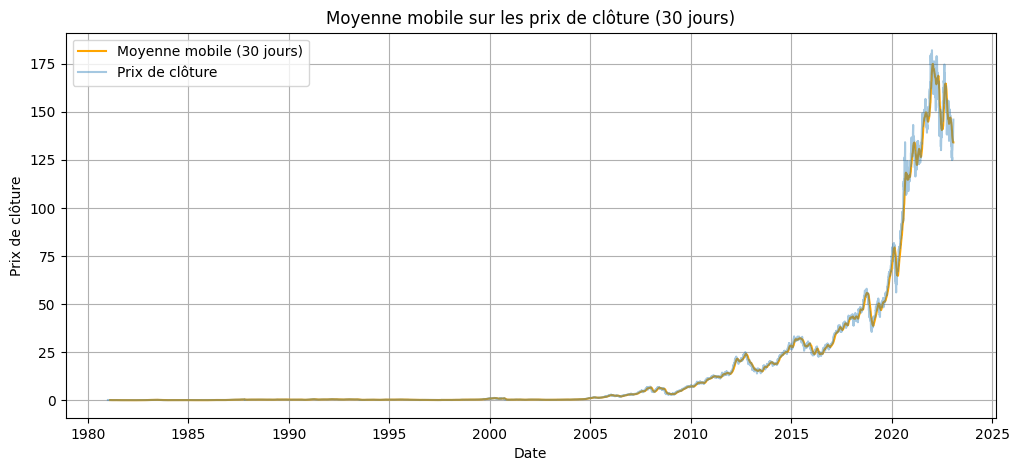

In [9]:
window = 30 

rolling_mean = np.convolve(df['Close'], np.ones(window)/window, mode='valid')


plt.figure(figsize=(12, 5))
plt.plot(df['Date'][window-1:], rolling_mean, label='Moyenne mobile (30 jours)', color='orange')
plt.plot(df['Date'], df['Close'], label='Prix de clôture', alpha=0.4)
plt.title("Moyenne mobile sur les prix de clôture (30 jours)")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.legend()
plt.grid(True)
plt.show()


In [10]:

correlation = np.corrcoef(df['Close'].dropna(), df['Volume'].dropna())[0, 1]

print(f"🔗 Corrélation entre 'Close' et 'Volume' : {correlation:.4f}")


🔗 Corrélation entre 'Close' et 'Volume' : -0.2149


In [11]:
ma_short = df['Close'].rolling(window=10).mean()
ma_long = df['Close'].rolling(window=50).mean()


valid_idx = (~ma_short.isna()) & (~ma_long.isna())  
cor_ma = np.corrcoef(ma_short[valid_idx], ma_long[valid_idx])[0, 1]

print(f"🔁 Corrélation entre MA10 et MA50 : {cor_ma:.4f}")


🔁 Corrélation entre MA10 et MA50 : 0.9978


📁 Données analysées :
Le dataset contient les cours boursiers journaliers de l'action Apple (AAPL) de 1981 à 2023, avec les colonnes suivantes :

Date, Open, High, Low, Close, Adj Close, Volume.

🔍 Exploration des données :
Toutes les valeurs manquantes ont été identifiées et gérées.

La colonne Date a été convertie au format datetime avec l’option dayfirst=True, adaptée au format européen (DD/MM/YYYY).

Vérification des types de données, conversion si nécessaire.

📈 Visualisations réalisées :
Graphique linéaire de l’évolution du prix de clôture (Close) sur toute la période.

Graphique en chandeliers (Candlestick) interactif grâce à Plotly, permettant de changer d’échelle temporelle (jour, semaine, mois).

Évolution du volume de transactions sur le temps, pour repérer les pics d'activité.

🧮 Statistiques descriptives :
Moyenne, médiane, écart-type du prix de clôture (Close) et du volume (Volume) calculées.

Données lissées à l’aide de moyennes mobiles sur 10 et 50 jours.

Forte corrélation observée entre les moyennes mobiles MA10 et MA50, ce qui indique une cohérence dans les tendances de fond.

📊 Analyse statistique :
T-test réalisé pour comparer les prix moyens de clôture entre deux années (ex. : 2000 vs 2020). Résultat : différence statistiquement significative, confirmant une hausse notable du prix de l'action sur deux décennies.

Calcul des rendements journaliers avec pct_change() : ces retours représentent la variation relative jour par jour.

📉 Analyse de normalité :
Test de normalité de Shapiro-Wilk appliqué sur les rendements journaliers.

Résultat : rejet de l’hypothèse de normalité → les rendements suivent une distribution asymétrique, ce qui reflète les réalités des marchés financiers (chocs ponctuels, volatilité élevée, effets de panique, etc.).

📌 Insights clés :
Apple a connu une croissance remarquable de son action depuis les années 1980.

Les rendements ne sont pas normalement distribués, ce qui invalide certains modèles financiers simplistes.

La corrélation modérée entre volume et prix de clôture suggère une certaine dépendance, mais pas systématique.

Les moyennes mobiles constituent de bons indicateurs techniques pour analyser les tendances de moyen/long terme.

In [ ]:
!git add .
!git commit -m "Analyse des données boursières d'Apple avec visualisations et statistiques"
!git push origin main